# Exploratory Time Series Analysis




“Exploratory Time series Analysis” 


Using Time Series for effective forcasting model  and control 


Hyndman suggested five basic steps Time series forecasting task

1.   Problem definition
2.   Gathering Information
3.   Preliminary Exploratory Analysis
4.   Choosing and Fitting Models
5.   Using and Evaluating a Forecasting    Model 






Objectives:


1.   Import required libraries and TS data
2.   Get review summary statistics
3.   Get insight from visualization graph
4.   Check the stationarity of the TS using ADF test and statitics
5.   Apply transformation to convert non-stationary to stationary



Both Trends and Seasonality are generally present in the majority of time series data of the real world. When we want to do the forecasting with time-series, we need a stationary time series. The stationary time series are data where there is no trend or seasonality information present in it. The stationary time series is a series with constant mean, constant variance, and constant autocorrelation. We need to find a way to remove trends and seasonality from our time series so that we can use it with prediction models. To do that, we need to understand what is trends and seasonality in-depth to handle it better. Apart from trend and seasonality, some time-series also has noise/error/residual component present as well. We can decompose time-series to see different components. We'll now try to explain the presence of trends and seasonality in this project  and how to handle it further with examples.

Trend 
The trends represent an increase or decrease in time-series value over time. If we notice that the value of measurement over time is increasing or decreasing then we can say that it has an upward or downward trend.

How to remove trend from time-series data?
There are various ways to de-trend a time series. We have explained a few below.

Log Transformation.
Power Transformation.
local smoothing - Applying moving window functions to time-series data.
Differencing a time-series.
Linear Regression.

Seasonality 
The seasonality represents variations in measured value which repeats over the same time interval regularly. If we notice that particular variations in value are happening every week, month, quarter or half-yearly then we can say that time series has some kind of seasonality.

How to remove seasonality from time-series data?
There are various ways to remove seasonality. The task of removing seasonality is a bit complicated. few ways below to remove seasonality are:

1. Average de-trended values.
2. Differencing a time-series.
3. Use the loess method.



#Task1a: Import Libraries




In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import pandas.testing as tm
import datetime
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from numpy import log

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Task1b: Import data




*   Data1: The dataset contains Number of Air passengers of each month from the year 1949 to 1960
*   Data2: Number of daily female births in california in 1959

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount("/content1")
air_travles=pd.read_csv('/content1/MyDrive/AirPassengers.csv',error_bad_lines=False)

female_births=pd.read_csv('/content1/MyDrive/daily-total-female-births-CA.csv')


Drive already mounted at /content1; to attempt to forcibly remount, call drive.mount("/content1", force_remount=True).


In [ ]:
air_travles

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


# Task 2: Data exploration

In [ ]:
# find the concise summary of the dataframe

air_travles.shape

(144, 2)

In [ ]:
air_travles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
# find the number of null values in the dataframe
air_travles.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [ ]:
air_travles.dtypes

Month          object
#Passengers     int64
dtype: object

In [ ]:
air_travles["Month"] = pd.to_datetime(air_travles['Month'],infer_datetime_format=True) #convert from string to datetime
air_travles = air_travles.set_index(['Month']) # choose "Month" col as index
air_travles.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121




Task 2:  Do the same for the second data set female birth rate

In [ ]:
female_births

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [ ]:
female_births.shape

(365, 2)

In [ ]:
female_births.describe()


,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [ ]:
female_births["date"] = pd.to_datetime(female_births['date'], infer_datetime_format=True)
female_births = female_births.set_index(["date"])
female_births.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [ ]:
female_births.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


#Task 3:visualization

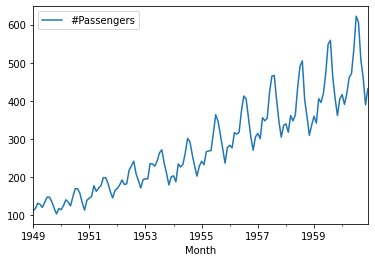

In [ ]:
#Line plot
air_travles.plot()
plt.show()


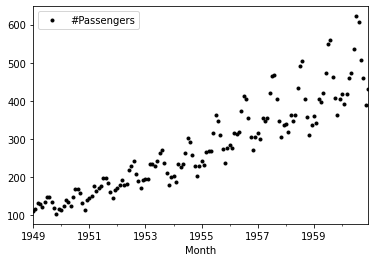

In [ ]:
#Scatter Plot
air_travles.plot(style='k.')
plt.show()

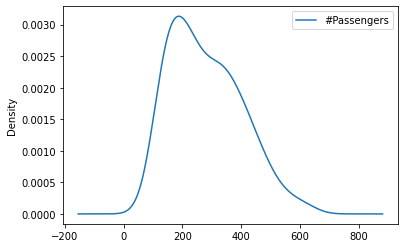

In [ ]:
#Density plot
air_travles.plot(kind='kde')
plt.show()

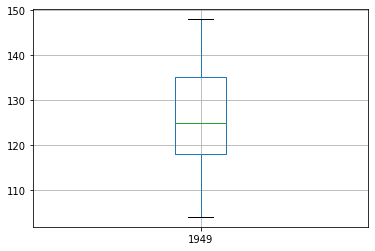

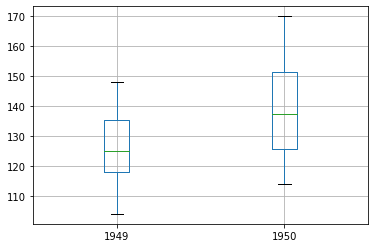

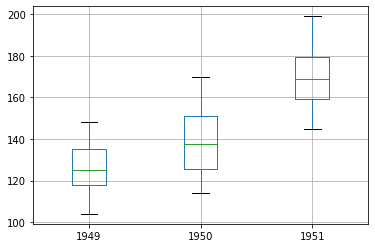

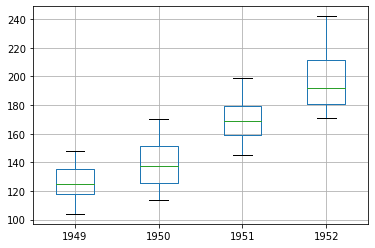

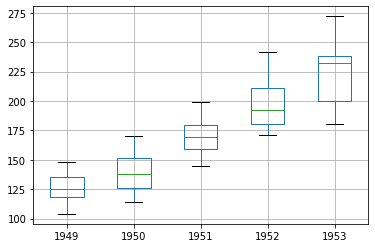

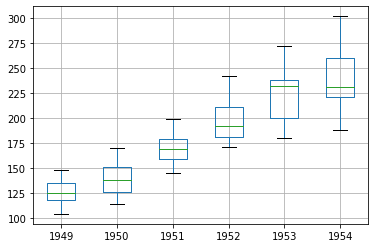

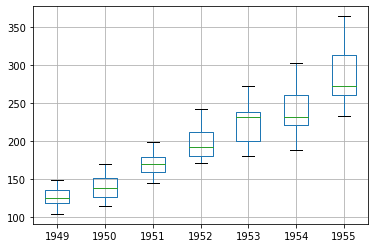

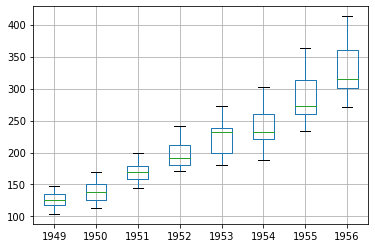

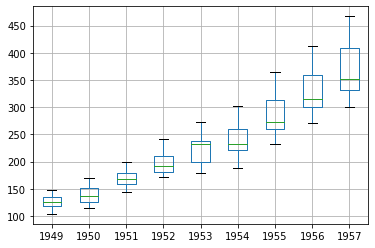

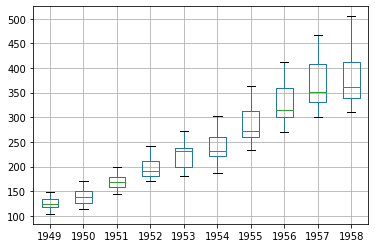

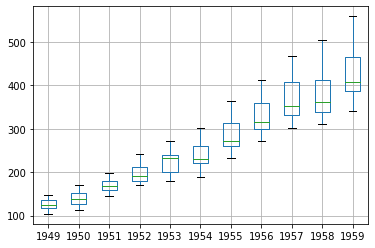

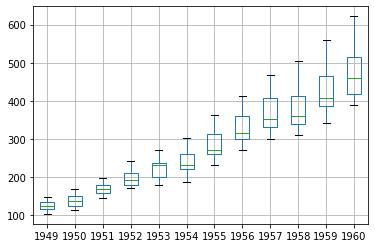

In [ ]:
#Box plot- five point summary
air_travles_series=pd.read_csv('/content1/MyDrive/AirPassengers.csv',header=0,index_col=0,parse_dates=True,squeeze=True)
gp=air_travles_series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for Month, group in gp:
  years[Month.year] = group.values
  years.boxplot()
  plt.show()


In [ ]:
air_travles_series.head(5)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

    1949
0    112
1    118
2    132
3    129
4    121
5    135
6    148
7    148
8    136
9    119
10   104
11   118


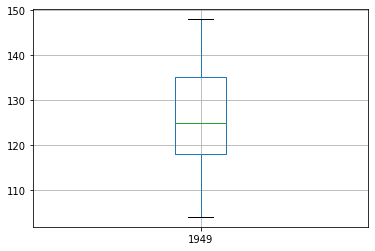

    1949  1950
0    112   115
1    118   126
2    132   141
3    129   135
4    121   125
5    135   149
6    148   170
7    148   170
8    136   158
9    119   133
10   104   114
11   118   140


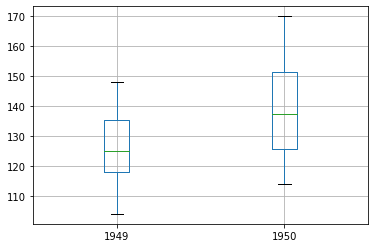

    1949  1950  1951
0    112   115   145
1    118   126   150
2    132   141   178
3    129   135   163
4    121   125   172
5    135   149   178
6    148   170   199
7    148   170   199
8    136   158   184
9    119   133   162
10   104   114   146
11   118   140   166


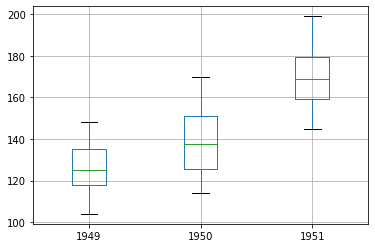

    1949  1950  1951  1952
0    112   115   145   171
1    118   126   150   180
2    132   141   178   193
3    129   135   163   181
4    121   125   172   183
5    135   149   178   218
6    148   170   199   230
7    148   170   199   242
8    136   158   184   209
9    119   133   162   191
10   104   114   146   172
11   118   140   166   194


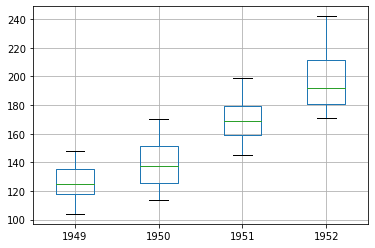

    1949  1950  1951  1952  1953
0    112   115   145   171   196
1    118   126   150   180   196
2    132   141   178   193   236
3    129   135   163   181   235
4    121   125   172   183   229
5    135   149   178   218   243
6    148   170   199   230   264
7    148   170   199   242   272
8    136   158   184   209   237
9    119   133   162   191   211
10   104   114   146   172   180
11   118   140   166   194   201


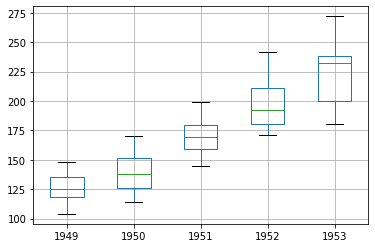

    1949  1950  1951  1952  1953  1954
0    112   115   145   171   196   204
1    118   126   150   180   196   188
2    132   141   178   193   236   235
3    129   135   163   181   235   227
4    121   125   172   183   229   234
5    135   149   178   218   243   264
6    148   170   199   230   264   302
7    148   170   199   242   272   293
8    136   158   184   209   237   259
9    119   133   162   191   211   229
10   104   114   146   172   180   203
11   118   140   166   194   201   229


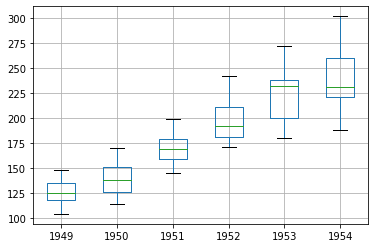

    1949  1950  1951  1952  1953  1954  1955
0    112   115   145   171   196   204   242
1    118   126   150   180   196   188   233
2    132   141   178   193   236   235   267
3    129   135   163   181   235   227   269
4    121   125   172   183   229   234   270
5    135   149   178   218   243   264   315
6    148   170   199   230   264   302   364
7    148   170   199   242   272   293   347
8    136   158   184   209   237   259   312
9    119   133   162   191   211   229   274
10   104   114   146   172   180   203   237
11   118   140   166   194   201   229   278


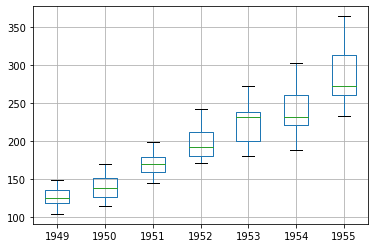

    1949  1950  1951  1952  1953  1954  1955  1956
0    112   115   145   171   196   204   242   284
1    118   126   150   180   196   188   233   277
2    132   141   178   193   236   235   267   317
3    129   135   163   181   235   227   269   313
4    121   125   172   183   229   234   270   318
5    135   149   178   218   243   264   315   374
6    148   170   199   230   264   302   364   413
7    148   170   199   242   272   293   347   405
8    136   158   184   209   237   259   312   355
9    119   133   162   191   211   229   274   306
10   104   114   146   172   180   203   237   271
11   118   140   166   194   201   229   278   306


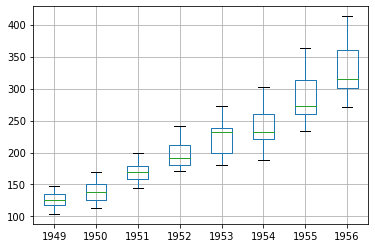

    1949  1950  1951  1952  1953  1954  1955  1956  1957
0    112   115   145   171   196   204   242   284   315
1    118   126   150   180   196   188   233   277   301
2    132   141   178   193   236   235   267   317   356
3    129   135   163   181   235   227   269   313   348
4    121   125   172   183   229   234   270   318   355
5    135   149   178   218   243   264   315   374   422
6    148   170   199   230   264   302   364   413   465
7    148   170   199   242   272   293   347   405   467
8    136   158   184   209   237   259   312   355   404
9    119   133   162   191   211   229   274   306   347
10   104   114   146   172   180   203   237   271   305
11   118   140   166   194   201   229   278   306   336


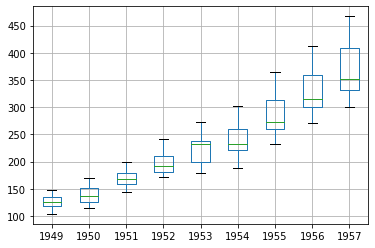

    1949  1950  1951  1952  1953  1954  1955  1956  1957  1958
0    112   115   145   171   196   204   242   284   315   340
1    118   126   150   180   196   188   233   277   301   318
2    132   141   178   193   236   235   267   317   356   362
3    129   135   163   181   235   227   269   313   348   348
4    121   125   172   183   229   234   270   318   355   363
5    135   149   178   218   243   264   315   374   422   435
6    148   170   199   230   264   302   364   413   465   491
7    148   170   199   242   272   293   347   405   467   505
8    136   158   184   209   237   259   312   355   404   404
9    119   133   162   191   211   229   274   306   347   359
10   104   114   146   172   180   203   237   271   305   310
11   118   140   166   194   201   229   278   306   336   337


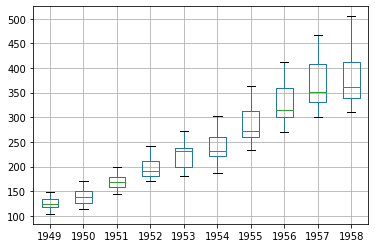

    1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959
0    112   115   145   171   196   204   242   284   315   340   360
1    118   126   150   180   196   188   233   277   301   318   342
2    132   141   178   193   236   235   267   317   356   362   406
3    129   135   163   181   235   227   269   313   348   348   396
4    121   125   172   183   229   234   270   318   355   363   420
5    135   149   178   218   243   264   315   374   422   435   472
6    148   170   199   230   264   302   364   413   465   491   548
7    148   170   199   242   272   293   347   405   467   505   559
8    136   158   184   209   237   259   312   355   404   404   463
9    119   133   162   191   211   229   274   306   347   359   407
10   104   114   146   172   180   203   237   271   305   310   362
11   118   140   166   194   201   229   278   306   336   337   405


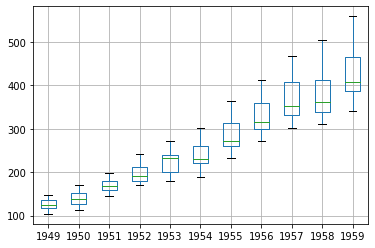

    1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
0    112   115   145   171   196   204   242   284   315   340   360   417
1    118   126   150   180   196   188   233   277   301   318   342   391
2    132   141   178   193   236   235   267   317   356   362   406   419
3    129   135   163   181   235   227   269   313   348   348   396   461
4    121   125   172   183   229   234   270   318   355   363   420   472
5    135   149   178   218   243   264   315   374   422   435   472   535
6    148   170   199   230   264   302   364   413   465   491   548   622
7    148   170   199   242   272   293   347   405   467   505   559   606
8    136   158   184   209   237   259   312   355   404   404   463   508
9    119   133   162   191   211   229   274   306   347   359   407   461
10   104   114   146   172   180   203   237   271   305   310   362   390
11   118   140   166   194   201   229   278   306   336   337   405   432


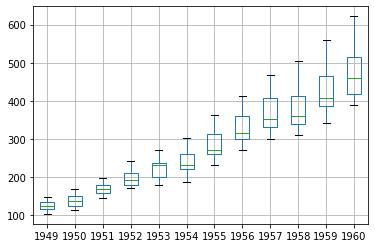

In [ ]:
years =pd.DataFrame()
for Month,group in gp:
    years[Month.year]=group.values
    print(years)
    years.boxplot()
    plt.show()

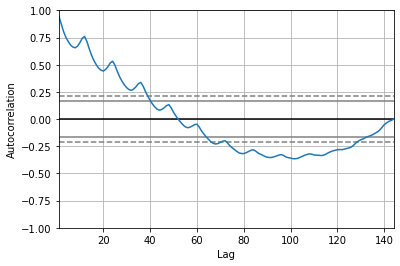

In [ ]:
#ACF plot air_travles
#autocorrleation
autocorrelation_plot(air_travles_series)
plt.show()

Do the same for the second data set female birth rate

In [ ]:
female_births_series=pd.read_csv('/content1/MyDrive/daily-total-female-births-CA.csv',header=0,index_col=0,parse_dates=True,squeeze=True)

female_births_series

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: births, Length: 365, dtype: int64

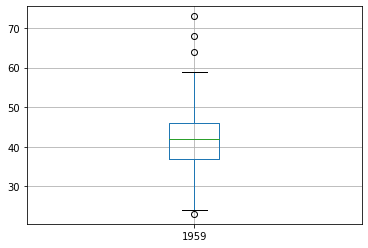

In [ ]:
gp = female_births_series.groupby(pd.Grouper(freq='A'))
years=pd.DataFrame()
for date, group in gp:
  years[date.year]=group.values
  years.boxplot()
  plt.show

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


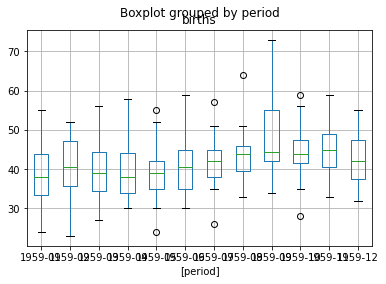

In [ ]:
female_births['period'] = female_births.index.to_period('M')
female_births.boxplot(by='period');

<function matplotlib.pyplot.show>

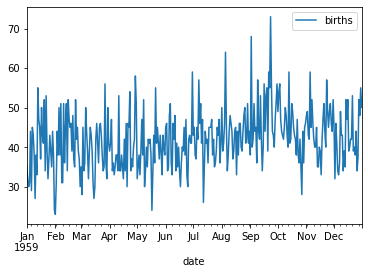

In [ ]:
female_births.plot()
plt.show

<function matplotlib.pyplot.show>

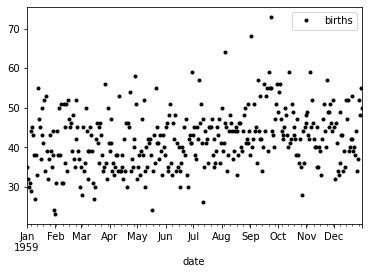

In [ ]:
female_births.plot(style='k.')
plt.show

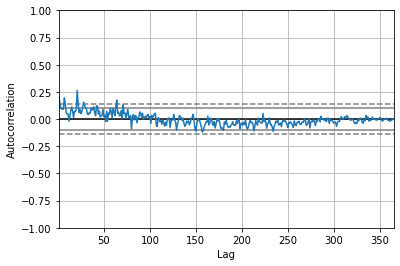

In [ ]:
# #ACF female_births
autocorrelation_plot(female_births_series)
plt.show()

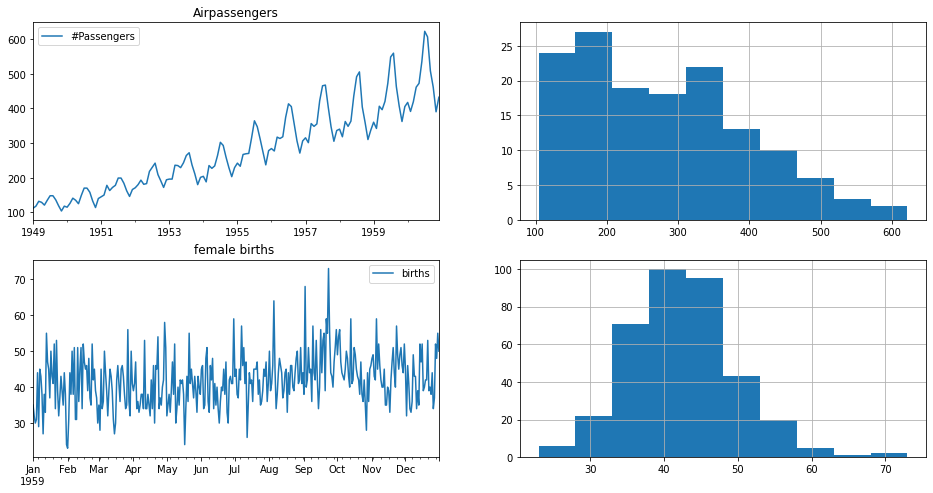

In [ ]:
#Multiple plots in single figure window using subplot
plt.figure(1, figsize=(16,8))
plt.subplot(221)
air_travles_series.plot(legend='Airpassenger',title='Airpassengers',xlabel='')
plt.subplot(222)
air_travles_series.hist()
plt.subplot(223)
female_births_series.plot(legend='female births',title='female births ',xlabel='')
plt.subplot(224)
female_births_series.hist()
plt.show()



---



**Note**: By viewing the line plot, we get to know about the trend and seasonality.
1. Line plot with trend and seasonality indicates the given series is non stationary  
2. Line plot without trend and seasonality indicates the given series is  stationary  
3. Differencing operator is used for remove the trend from series.




In [ ]:
# To remove the trend apply differencing operation
d_air_travels =air_travles_series.diff() # newx1 = x[1] - x[0]

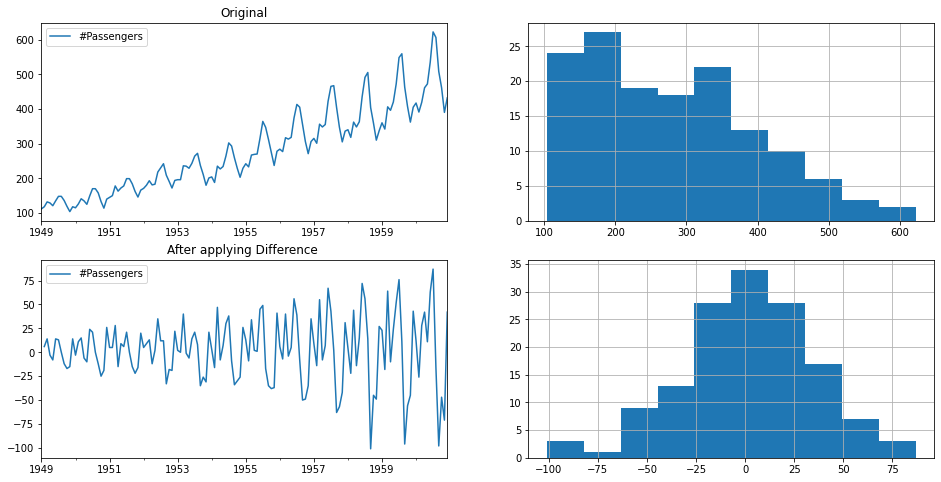

In [ ]:
plt.figure(1, figsize=(16,8))
plt.subplot(221)
air_travles_series.plot(legend='Airpassenger',title='Original',xlabel='')
plt.subplot(222)
air_travles_series.hist()
plt.subplot(223)
d_air_travels.plot(legend='Diff(air_travles_series)',title='After applying Difference ',xlabel='')
plt.subplot(224)
d_air_travels.hist()
plt.show()

# Task 4: Check the stationarity by  statistics measures and ADF test 

## Task4a:  Statistical measures

In [ ]:
#Airpassengers data [NS]
air_travels_values=air_travles_series.values
dfpart=int(len(air_travles_series.values)/2)
p1,p2=air_travels_values[0:dfpart],air_travels_values[dfpart:]
#type mean,var
meanp1,meanp2=p1.mean(),p2.mean()
varp1,varp2=p1.var(),p2.var()
print('Part1 mean= %f; Part1 variance= %f'%(meanp1,varp1))
print('Part2 mean= %f; Part2 variance= %f'%(meanp2,varp2))

Part1 mean= 182.902778; Part1 variance= 2244.087770
Part2 mean= 377.694444; Part2 variance= 7367.962191


**Note**:  Mean and variance inconsistent .Hence it is non-stationary .

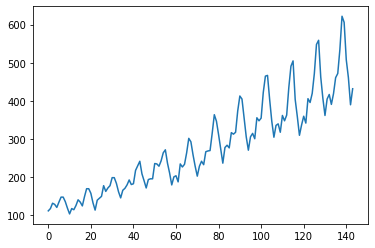

In [ ]:
plt.plot(air_travels_values)

In [ ]:
# After taking difference for Airpassengers data 
d_air_travels_values=d_air_travels.values 
d_air_travels_values=d_air_travels_values[2:144]
dfpart=int(len(d_air_travels_values)/2)
p1,p2=d_air_travels_values[0:dfpart],d_air_travels_values[dfpart:]
#type mean,var
meanp1,meanp2=p1.mean(),p2.mean()
varp1,varp2=p1.var(),p2.var()
print('Part1 mean= %f; Part1 variance= %f'%(meanp1,varp1))
print('Part2 mean= %f; Part2 variance= %f'%(meanp2,varp2))

Part1 mean= 1.746479; Part1 variance= 366.132910
Part2 mean= 2.676056; Part2 variance= 1911.937314


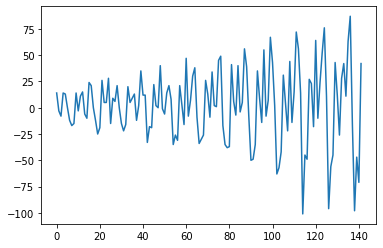

In [ ]:
plt.plot(d_air_travels_values)

**Note**: Trend is removed by differencing operator
Mean consistent; But variance inconsistent;
Non stationary

Perform statistical measures for Female Births

In [ ]:
female_births_series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

In [ ]:
# #Female Birth  data [S]
female_births_values=female_births['births'].values 
d_f_b_part=int(len(female_births_values)/2)
p1,p2=female_births_values[0:d_f_b_part],female_births_values[d_f_b_part:]
meanp1,meanp2=p1.mean(),p2.mean()
varp1,varp2=p1.var(),p2.var()
print('Part1 mean= %f; Part1 variance= %f'%(meanp1,varp1))
print('Part2 mean= %f; Part2 variance= %f'%(meanp2,varp2))

Part1 mean= 39.763736; Part1 variance= 49.213410
Part2 mean= 44.185792; Part2 variance= 48.708651


Note: Mean and variance consistent .Hence it is stationary .

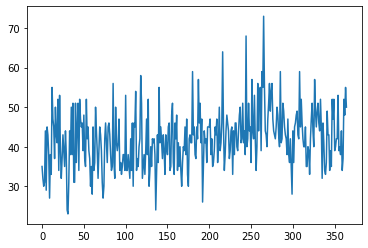

In [ ]:
plt.plot(female_births_values)

difference for fb.csv and check mean, variance for partitioned data

In [ ]:
d_female_births = female_births_series.diff()


In [ ]:
d_female_births_values=d_female_births.values 
d_female_births_values=d_female_births_values[1:365]
dfpart=int(len(d_female_births_values)/2)
p1,p2=d_female_births_values[0:dfpart],d_female_births_values[dfpart:]
#type mean,var
meanp1,meanp2=p1.mean(),p2.mean()
varp1,varp2=p1.var(),p2.var()
print('Part1 mean= %f; Part1 variance= %f'%(meanp1,varp1))
print('Part2 mean= %f; Part2 variance= %f'%(meanp2,varp2))

Part1 mean= 0.054945; Part1 variance= 92.007970
Part2 mean= 0.027473; Part2 variance= 76.433311


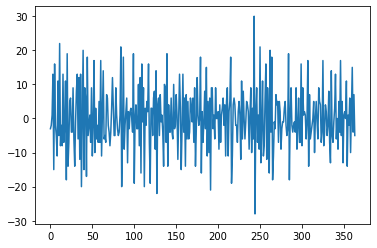

In [ ]:
plt.plot(d_female_births_values)

#Task4b: ADF  test

In [ ]:
#Airpassengers
from statsmodels.tsa.stattools import adfuller
d = air_travles_series.values
res=adfuller(d)
res
print('ADF Statistics\t: %f'%res[0])
print('p-value\t\t:%f'%res[1])
print('Critical Values:')
for key,value in res[4].items():
    print('\t\t%s: %.3f'%(key, value)) 

ADF Statistics	: 0.815369
p-value		:0.991880
Critical Values:
		1%: -3.482
		5%: -2.884
		10%: -2.579


In [ ]:
res

(0.8153688792060418,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.692930839019)

ADF-Augumented Fuller Test[Unit root test]: 


*   H0:Null hypothesis : TS is non-stationary 
*   H1:Alternative hypothesis: TS is stationary




**Note**:

p-value below critical values, reject H0; Given TS is Stationary
p-value above critical values, accept H0; Given TS is non-stationary



**Inference**: For the given AirPassengers .csv ,ADF value greater than critical value; Hence accept H0 . Given TS is non-stationary

In [ ]:
#Detrend Airpassengers data using difference operator
#from statsmodels.tsa.stattools import adfuller
d = d_air_travels.values
d=d[1:144]
res=adfuller(d)
res
print('ADF Statistics\t: %f'%res[0])
print('p-value\t\t:%f'%res[1])
print('Critical Values:')
for key,value in res[4].items():
    print('\t\t%s: %.3f'%(key, value)) 


ADF Statistics	: -2.829267
p-value		:0.054213
Critical Values:
		1%: -3.482
		5%: -2.884
		10%: -2.579


In [ ]:
res

(-2.829266824169997,
 0.05421329028382577,
 12,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 988.5069317854085)

**Note**: ADF statistics lesser than 10% but greater than 1 % and 5% 
At 1% and 5% accept H0; Nonstationary

Compute ADF value for fb.csv

In [ ]:
#For female birth data ADF
d = female_births_series.values
res=adfuller(d)
print('ADF Statistics\t: %f'%res[0])
print('p-value\t\t:%f'%res[1])
print('Critical Values:')
for key,value in res[4].items():
    print('\t\t%s: %.3f'%(key, value)) 

ADF Statistics	: -4.808291
p-value		:0.000052
Critical Values:
		1%: -3.449
		5%: -2.870
		10%: -2.571


In [ ]:
res

(-4.808291253559763,
 5.243412990149865e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '10%': -2.5710891239349585,
  '5%': -2.8696473721448728},
 2343.82909264642)

**Inference:  For fb.csv, ADF value less than critical values, reject H0.
Given data set is Stationary**


In [ ]:
d = d_female_births.values
d=d[1:365]
res=adfuller(d)
print('ADF Statistics\t: %f'%res[0])
print('p-value\t\t:%f'%res[1])
print('Critical Values:')
for key,value in res[4].items():
    print('\t\t%s: %.3f'%(key, value)) 

ADF Statistics	: -12.625179
p-value		:0.000000
Critical Values:
		1%: -3.449
		5%: -2.870
		10%: -2.571


In [ ]:
res

(-12.625178633871355,
 1.5472400091969005e-23,
 6,
 357,
 {'1%': -3.44880082033912,
  '10%': -2.5711012838861036,
  '5%': -2.869670179576637},
 2355.0565353964653)

#Task5a:Apply Transformation function to TS 
[converting non-staionary to stationary]

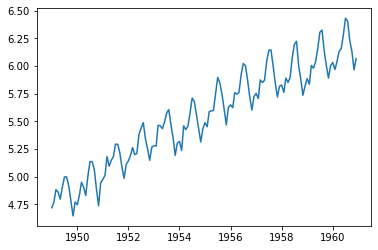

In [ ]:
#Apply log transform for Airpassengers
from numpy import log
d1=log(air_travles_series)
plt.plot(d1)



In [ ]:
dlr=log(d_air_travels)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


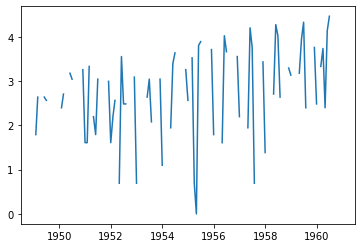

In [ ]:
plt.plot(dlr)

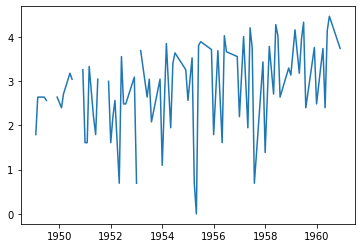

In [ ]:
plt.plot(dlr.dropna())

**Note**: Original Airpassengers data set with inconsistent mean and variance.
After log tranformation, Mean and variance slightly inconsistent.
still seasonlity is there . So non stationary

In [ ]:
d = log(air_travles_series.values)
res=adfuller(d)
print('ADF Statistics\t: %f'%res[0])
print('p-value\t\t:%f'%res[1])
print('Critical Values:')
for key,value in res[4].items():
    print('\t\t%s: %.3f'%(key, value)) 

ADF Statistics	: -1.717017
p-value		:0.422367
Critical Values:
		1%: -3.482
		5%: -2.884
		10%: -2.579


**Note**: ADF stat value greater than critical values. Hence accept H0. It is non-stationary

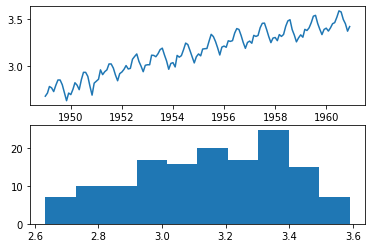

In [ ]:
from scipy.stats import boxcox
#air_travles.plot()
air_travles['#Passengers'] = boxcox(air_travles['#Passengers'], lmbda=0.0)
plt.figure(1)
plt.subplot(211)
plt.plot(air_travles['#Passengers'])
plt.subplot(212)
plt.hist(air_travles['#Passengers'])
plt.show()


In [ ]:
dfpart=int(len(air_travles['#Passengers'])/2)
p1,p2=air_travles[0:dfpart],air_travles[dfpart:]
meanp1,meanp2=p1.mean(),p2.mean()
varp1,varp2=p1.var(),p2.var()
print('Part1 mean= %f; Part1 variance= %f'%(meanp1,varp1))
print('Part2 mean= %f; Part2 variance= %f'%(meanp2,varp2))

Part1 mean= 5.175146; Part1 variance= 0.069338
Part2 mean= 5.909206; Part2 variance= 0.049958


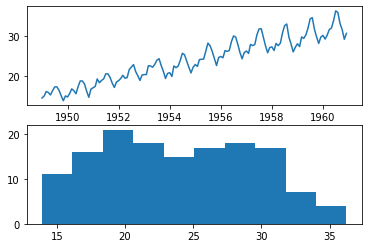

In [ ]:
#Box-cox transform - automatically 

air_travles['#Passengers'],lamd = boxcox(air_travles['#Passengers'])
air_travles['#Passengers']= boxcox(air_travles['#Passengers'],lmbda=lamd)
plt.figure(1)
plt.subplot(211)
plt.plot(air_travles['#Passengers'])
plt.subplot(212)
plt.hist(air_travles['#Passengers'])
plt.show()

**Note**: In the transformed data, Mean and variance consistent. Hence **Stationary**

**SUMMARY**

The given Airpassengers.csv is non-stationary.
1. It is verified by computing statistic measures mean and variance.
In this data , they are inconsistent. 
2. ADF statistic greater than critical values ,hence accept H0.Given set is non-stationary.
3. Transformation like log, Box-cox applied.
For this transformed data set , compute mean and variance. 
4.ADF test statistics smaller than critical values .
5. Apply difference operator to remove trend in Airpassengers data.
6. View line plot, trend removed; still seasonality present
7. Compute mean, variance for detrend data.
8. Apply ADF test for detrend data.
9. Remove seasonality; check the behaviour.









